In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
from platform import python_version
import graph_tool
import pickle


## Датасет (Anaheim)

In [2]:
#EXAMPLE DATA (REAL DATA) (ANAHEIM)
beckmann_save = 'beckmann_results/'
cities_data = 'cities_data/'
net_name = cities_data + 'Anaheim_net.tntp'
trips_name = cities_data + 'Anaheim_trips.tntp'
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)
graph_data['graph_table'].head()

,init_node,init_node_thru,term_node,term_node_thru,capacity,free_flow_time
0,1,False,117,True,9000.0,1.090458
1,2,False,87,True,9000.0,1.090458
2,3,False,74,True,9000.0,1.090458
3,4,False,233,True,9000.0,1.090458
4,5,False,165,True,9000.0,1.090458


In [4]:
max_iter = 10000

# Conjugate FWM test

In [5]:
assert(model.mu == 0.25)

print('Conjugate Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 3000, 'save_history' : True , "alpha_default" : 0.6}
tic = time.time()
result_cfwm = model.find_equilibrium(solver_name = 'cfwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result_cfwm['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result_cfwm['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Conjugate Frank-Wolfe without stopping criteria
Composite optimization...
Oracles created...
Conjugate Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 3000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.21191
Duality_gap / Duality_gap_init = 4.42092e-06

Iterations number: 6000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.105828
Duality_gap / Duality_gap_init = 2.20781e-06

Iterations number: 9000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.0701746
Duality_gap / Duality_gap_init = 1.464e-06

Result: success
Total iters: 10000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.063163
Duality_gap / Duality_gap_init = 1.31772e-06
Oracle elapsed time: 1061 sec
Elapsed time: 1081 sec
Time ratio = 3.300328884771252
Flow excess = 0.9788991687438129



# Conjugate FWM (With linesearch) test

In [6]:
assert(model.mu == 0.25)

print('Conjugate Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 3000, 'save_history' : True , "alpha_default" : 0.6 , "linesearch" :True}
tic = time.time()
result_cfwm_linesearch = model.find_equilibrium(solver_name = 'cfwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result_cfwm_linesearch['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result_cfwm_linesearch['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')


Conjugate Frank-Wolfe without stopping criteria
Composite optimization...
Oracles created...
Conjugate Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4


/home/igoreshka/miniconda3/envs/gt/lib/python3.8/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "



Iterations number: 3000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.34193
Duality_gap / Duality_gap_init = 7.13344e-06

Iterations number: 6000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.182267
Duality_gap / Duality_gap_init = 3.80251e-06

Iterations number: 9000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.126077
Duality_gap / Duality_gap_init = 2.63025e-06

Result: success
Total iters: 10000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.114647
Duality_gap / Duality_gap_init = 2.39179e-06
Oracle elapsed time: 1099 sec
Elapsed time: 1280 sec
Time ratio = 3.300372781090577
Flow excess = 0.9789053411807618



# FWM test

In [7]:


assert(model.mu == 0.25)

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 3000, 'save_history' : True}
tic = time.time()
result_fwm = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result_fwm['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result_fwm['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')


Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 3000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.38899
Duality_gap / Duality_gap_init = 8.11521e-06

Iterations number: 6000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.192024
Duality_gap / Duality_gap_init = 4.00605e-06

Iterations number: 9000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.127592
Duality_gap / Duality_gap_init = 2.66186e-06

Result: success
Total iters: 10000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.114635
Duality_gap / Duality_gap_init = 2.39155e-06
Oracle elapsed time: 782 sec
Elapsed time: 791 sec
Time ratio = 3.300313118747732
Flow excess = 0.9788966357330946





# FWM (With linesearch) test

In [8]:

assert(model.mu == 0.25)

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 3000, 'save_history' : True , "linesearch" : True}
tic = time.time()
result_fwm_linesearch = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result_fwm_linesearch['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result_fwm_linesearch['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')


Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4


/home/igoreshka/miniconda3/envs/gt/lib/python3.8/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "



Iterations number: 3000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.716083
Duality_gap / Duality_gap_init = 1.49391e-05

Iterations number: 6000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.374887
Duality_gap / Duality_gap_init = 7.821e-06

Iterations number: 9000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.25648
Duality_gap / Duality_gap_init = 5.35075e-06

Result: success
Total iters: 10000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.232088
Duality_gap / Duality_gap_init = 4.84189e-06
Oracle elapsed time: 1476 sec
Elapsed time: 1710 sec
Time ratio = 3.3002987610169816
Flow excess = 0.9789045699170265



# Сравнение 

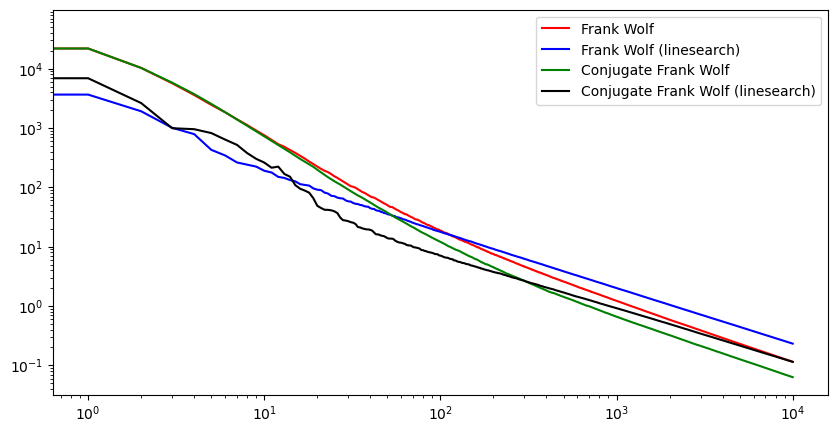

In [23]:
dual_gaps_fwm = result_fwm['duality_gaps']
dual_gaps_cfwm = result_cfwm['duality_gaps']
dual_gaps_cfwm_linesearch = result_cfwm_linesearch['duality_gaps']
dual_gaps_fwm_linesearch = result_fwm_linesearch['duality_gaps']
iters = np.arange(10000)
plt.figure(figsize = (10, 5))

# plt.plot(iters, dual_gaps_fwm , color ='red' ,label = 'Frank Wolf')
# plt.plot(iters, dual_gaps_fwm_linesearch , color = 'grey' ,label = 'Frank Wolf (linesearch)')
# plt.plot(iters, dual_gaps_cfwm , color = 'green' ,label = 'Conjugate Frank Wolf')
# plt.plot(iters, dual_gaps_cfwm_linesearch , color = 'brown' ,label = 'Conjugate Frank Wolf (linesearch)')

plt.loglog(iters, dual_gaps_fwm , color ='red' ,label = 'Frank Wolf')
plt.loglog(iters, dual_gaps_fwm_linesearch , color = 'blue' ,label = 'Frank Wolf (linesearch)')
plt.loglog(iters, dual_gaps_cfwm , color = 'green' ,label = 'Conjugate Frank Wolf')
plt.loglog(iters, dual_gaps_cfwm_linesearch , color = 'black' ,label = 'Conjugate Frank Wolf (linesearch)')


plt.legend()
# plt.yscale('log')
plt.show()


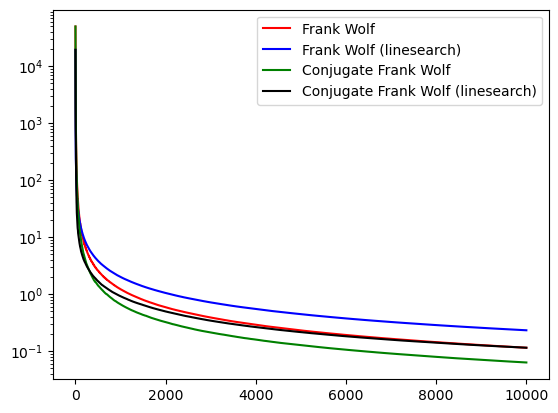

In [24]:
plt.plot(iters, dual_gaps_fwm , color ='red' ,label = 'Frank Wolf')
plt.plot(iters, dual_gaps_fwm_linesearch , color = 'blue' ,label = 'Frank Wolf (linesearch)')
plt.plot(iters, dual_gaps_cfwm , color = 'green' ,label = 'Conjugate Frank Wolf')
plt.plot(iters, dual_gaps_cfwm_linesearch , color = 'black' ,label = 'Conjugate Frank Wolf (linesearch)')

plt.legend()
plt.yscale('log')
plt.show()

# Большой датасет (Chicago)

In [12]:
beckmann_save = 'beckmann_results/'
cities_data = 'cities_data/'
net_name = cities_data + 'ChicagoSketch_net.tntp'
trips_name = cities_data + 'ChicagoSketch_trips.tntp'
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)
graph_data['graph_table'].head()

,init_node,init_node_thru,term_node,term_node_thru,capacity,free_flow_time
0,1,True,547,True,49500.0,0.0
1,2,True,548,True,49500.0,0.0
2,3,True,549,True,49500.0,0.0
3,4,True,550,True,49500.0,0.0
4,5,True,551,True,49500.0,0.0


In [15]:
max_iter = 1000

# Conjugate FW

In [16]:
assert(model.mu == 0.25)

print('Conjugate Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 200, 'save_history' : True , "alpha_default" : 0.6}
tic = time.time()
result_cfwm_2 = model.find_equilibrium(solver_name = 'cfwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result_cfwm['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result_cfwm['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Conjugate Frank-Wolfe without stopping criteria
Composite optimization...
Oracles created...
Conjugate Frank-Wolfe method...
Primal_init = 3.58134e+07
Dual_init = -1.60496e+07
Duality_gap_init = 1.97638e+07

Iterations number: 200
Primal_func_value = 1.67488e+07
Dual_func_value = -1.67469e+07
Duality_gap = 1956.35
Duality_gap / Duality_gap_init = 9.89865e-05

Iterations number: 400
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67481e+07
Duality_gap = 441.251
Duality_gap / Duality_gap_init = 2.23262e-05

Iterations number: 600
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67483e+07
Duality_gap = 215.858
Duality_gap / Duality_gap_init = 1.09219e-05

Iterations number: 800
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67483e+07
Duality_gap = 136.023
Duality_gap / Duality_gap_init = 6.88244e-06

Iterations number: 1000
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67484e+07
Duality_gap = 96.5671
Duality_gap / Duality_gap_init = 4.88606e-06

Result: success
Total

ValueError: operands could not be broadcast together with shapes (914,) (2950,) 

# Conjugate FW (with linesearch)

In [18]:
assert(model.mu == 0.25)

print('Conjugate Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 200, 'save_history' : True , "alpha_default" : 0.6 , "linesearch" :True}
tic = time.time()
result_cfwm_linesearch_2 = model.find_equilibrium(solver_name = 'cfwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
# print('Time ratio =', np.max(result_cfwm_linesearch['times'] / graph_data['graph_table']['free_flow_time']))
# print('Flow excess =', np.max(result_cfwm_linesearch['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')


Conjugate Frank-Wolfe without stopping criteria
Composite optimization...
Oracles created...
Conjugate Frank-Wolfe method...
Primal_init = 3.58134e+07
Dual_init = -1.60496e+07
Duality_gap_init = 1.97638e+07


/home/igoreshka/miniconda3/envs/gt/lib/python3.8/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "



Iterations number: 200
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67481e+07
Duality_gap = 397.804
Duality_gap / Duality_gap_init = 2.01279e-05

Iterations number: 400
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67482e+07
Duality_gap = 218.062
Duality_gap / Duality_gap_init = 1.10334e-05

Iterations number: 600
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67483e+07
Duality_gap = 154.212
Duality_gap / Duality_gap_init = 7.80274e-06

Iterations number: 800
Primal_func_value = 1.67484e+07
Dual_func_value = -1.67483e+07
Duality_gap = 120.697
Duality_gap / Duality_gap_init = 6.107e-06

Iterations number: 1000
Primal_func_value = 1.67484e+07
Dual_func_value = -1.67483e+07
Duality_gap = 99.6101
Duality_gap / Duality_gap_init = 5.04003e-06

Result: success
Total iters: 1000
Primal_func_value = 1.67484e+07
Dual_func_value = -1.67483e+07
Duality_gap = 99.6101
Duality_gap / Duality_gap_init = 5.04003e-06
Oracle elapsed time: 2579 sec
Elapsed time: 2595 sec


# Frank Wolfe

In [19]:


assert(model.mu == 0.25)

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 200, 'save_history' : True}
tic = time.time()
result_fwm_2 = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
# print('Time ratio =', np.max(result_fwm['times'] / graph_data['graph_table']['free_flow_time']))
# print('Flow excess =', np.max(result_fwm['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')


Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 3.58134e+07
Dual_init = -1.60496e+07
Duality_gap_init = 1.97638e+07

Iterations number: 200
Primal_func_value = 1.67488e+07
Dual_func_value = -1.67465e+07
Duality_gap = 2359.55
Duality_gap / Duality_gap_init = 0.000119387

Iterations number: 400
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67479e+07
Duality_gap = 639.817
Duality_gap / Duality_gap_init = 3.23732e-05

Iterations number: 600
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67481e+07
Duality_gap = 342.925
Duality_gap / Duality_gap_init = 1.73512e-05

Iterations number: 800
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67482e+07
Duality_gap = 232.936
Duality_gap / Duality_gap_init = 1.1786e-05

Iterations number: 1000
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67483e+07
Duality_gap = 175.485
Duality_gap / Duality_gap_init = 8.87912e-06

Result: success
Total iters: 1000
Primal_func_value = 1.67485e+07
Du

# Frank Wolfe (with linesearch)

In [20]:

assert(model.mu == 0.25)

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 200, 'save_history' : True , "linesearch" : True}
tic = time.time()
result_fwm_linesearch_2 = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
# print('Time ratio =', np.max(result_fwm_linesearch['times'] / graph_data['graph_table']['free_flow_time']))
# print('Flow excess =', np.max(result_fwm_linesearch['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')


Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 3.58134e+07
Dual_init = -1.60496e+07
Duality_gap_init = 1.97638e+07


/home/igoreshka/miniconda3/envs/gt/lib/python3.8/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "



Iterations number: 200
Primal_func_value = 1.67488e+07
Dual_func_value = -1.67473e+07
Duality_gap = 1486.47
Duality_gap / Duality_gap_init = 7.52119e-05

Iterations number: 400
Primal_func_value = 1.67486e+07
Dual_func_value = -1.67479e+07
Duality_gap = 696.397
Duality_gap / Duality_gap_init = 3.5236e-05

Iterations number: 600
Primal_func_value = 1.67486e+07
Dual_func_value = -1.67481e+07
Duality_gap = 463.559
Duality_gap / Duality_gap_init = 2.34549e-05

Iterations number: 800
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67482e+07
Duality_gap = 354.996
Duality_gap / Duality_gap_init = 1.79619e-05

Iterations number: 1000
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67482e+07
Duality_gap = 288.832
Duality_gap / Duality_gap_init = 1.46142e-05

Result: success
Total iters: 1000
Primal_func_value = 1.67485e+07
Dual_func_value = -1.67482e+07
Duality_gap = 288.832
Duality_gap / Duality_gap_init = 1.46142e-05
Oracle elapsed time: 2884 sec
Elapsed time: 2901 sec


# Сравнение (большой датасет)

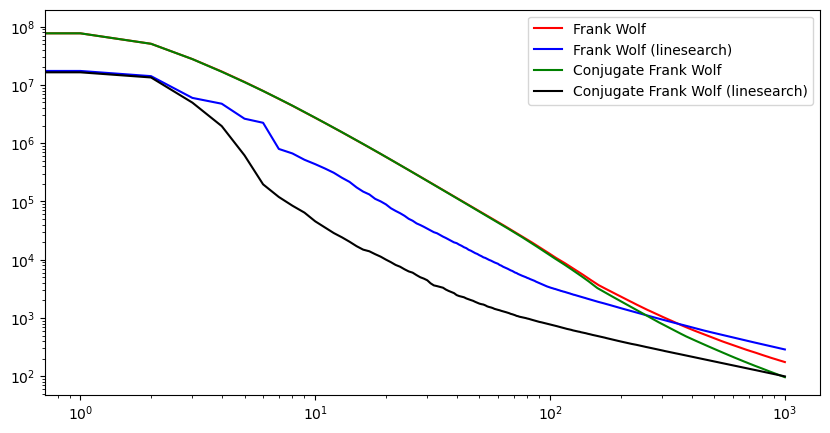

In [26]:
dual_gaps_fwm = result_fwm_2['duality_gaps']
dual_gaps_cfwm = result_cfwm_2['duality_gaps']
dual_gaps_cfwm_linesearch = result_cfwm_linesearch_2['duality_gaps']
dual_gaps_fwm_linesearch = result_fwm_linesearch_2['duality_gaps']
iters = np.arange(max_iter)
plt.figure(figsize = (10, 5))

# plt.plot(iters, dual_gaps_fwm , color ='red' ,label = 'Frank Wolf')
# plt.plot(iters, dual_gaps_fwm_linesearch , color = 'grey' ,label = 'Frank Wolf (linesearch)')
# plt.plot(iters, dual_gaps_cfwm , color = 'green' ,label = 'Conjugate Frank Wolf')
# plt.plot(iters, dual_gaps_cfwm_linesearch , color = 'brown' ,label = 'Conjugate Frank Wolf (linesearch)')

plt.loglog(iters, dual_gaps_fwm , color ='red' ,label = 'Frank Wolf')
plt.loglog(iters, dual_gaps_fwm_linesearch , color = 'blue' ,label = 'Frank Wolf (linesearch)')
plt.loglog(iters, dual_gaps_cfwm , color = 'green' ,label = 'Conjugate Frank Wolf')
plt.loglog(iters, dual_gaps_cfwm_linesearch , color = 'black' ,label = 'Conjugate Frank Wolf (linesearch)')


plt.legend()
# plt.yscale('log')
plt.show()


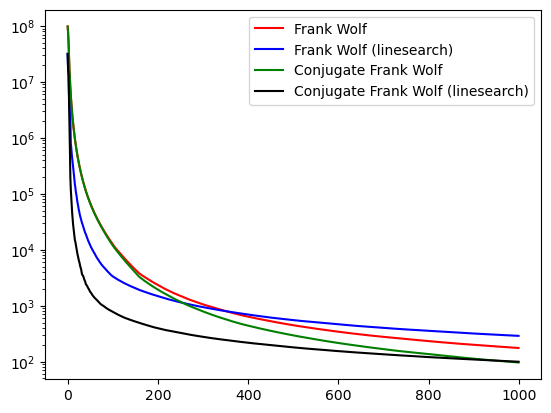

In [27]:
plt.plot(iters, dual_gaps_fwm , color ='red' ,label = 'Frank Wolf')
plt.plot(iters, dual_gaps_fwm_linesearch , color = 'blue' ,label = 'Frank Wolf (linesearch)')
plt.plot(iters, dual_gaps_cfwm , color = 'green' ,label = 'Conjugate Frank Wolf')
plt.plot(iters, dual_gaps_cfwm_linesearch , color = 'black' ,label = 'Conjugate Frank Wolf (linesearch)')
plt.legend()
plt.yscale('log')
plt.show()
